In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from kmer_profile_decomposer import KmerProfileModel

In [2]:
df = pd.read_table("tests/data/kmer_profile.tsv", names=("depth", "count"))

## Linear residuals

In [3]:
model = KmerProfileModel(df['depth'], df['count'], 12, 15, 2000)
result = model.fit(107, residuals='linear')

/workspace/kmer-profile-decomposer/src/kmer_profile_decomposer/decomposer.py:217: RuntimeWarning: divide by zero encountered in log
  predicted_log_counts = np.log(predicted_counts)


In [4]:
result

_KmerProfileModelFitResult(peaks=12, min_depth=15, max_depth=2000, parameters=_KmerProfileModelParameters(error_dispersion=0.1382788005437073, error_weight=2.6995121773112007, haploid_depth=106.94600328439472, peak_dispersion_bias=1.5398937789201663, peak_weights=[0.03043700336115711, 0.5103032636606998, 0.011705935663490544, 0.0930762456281533, 0.0053519511948737705, 0.02291754084487295, 0.0027827196523075763, 0.007214288137433299, 0.0016834548965449611, 0.0029645520113530843, 0.0009465103777133883, 0.0018531635049286808]))

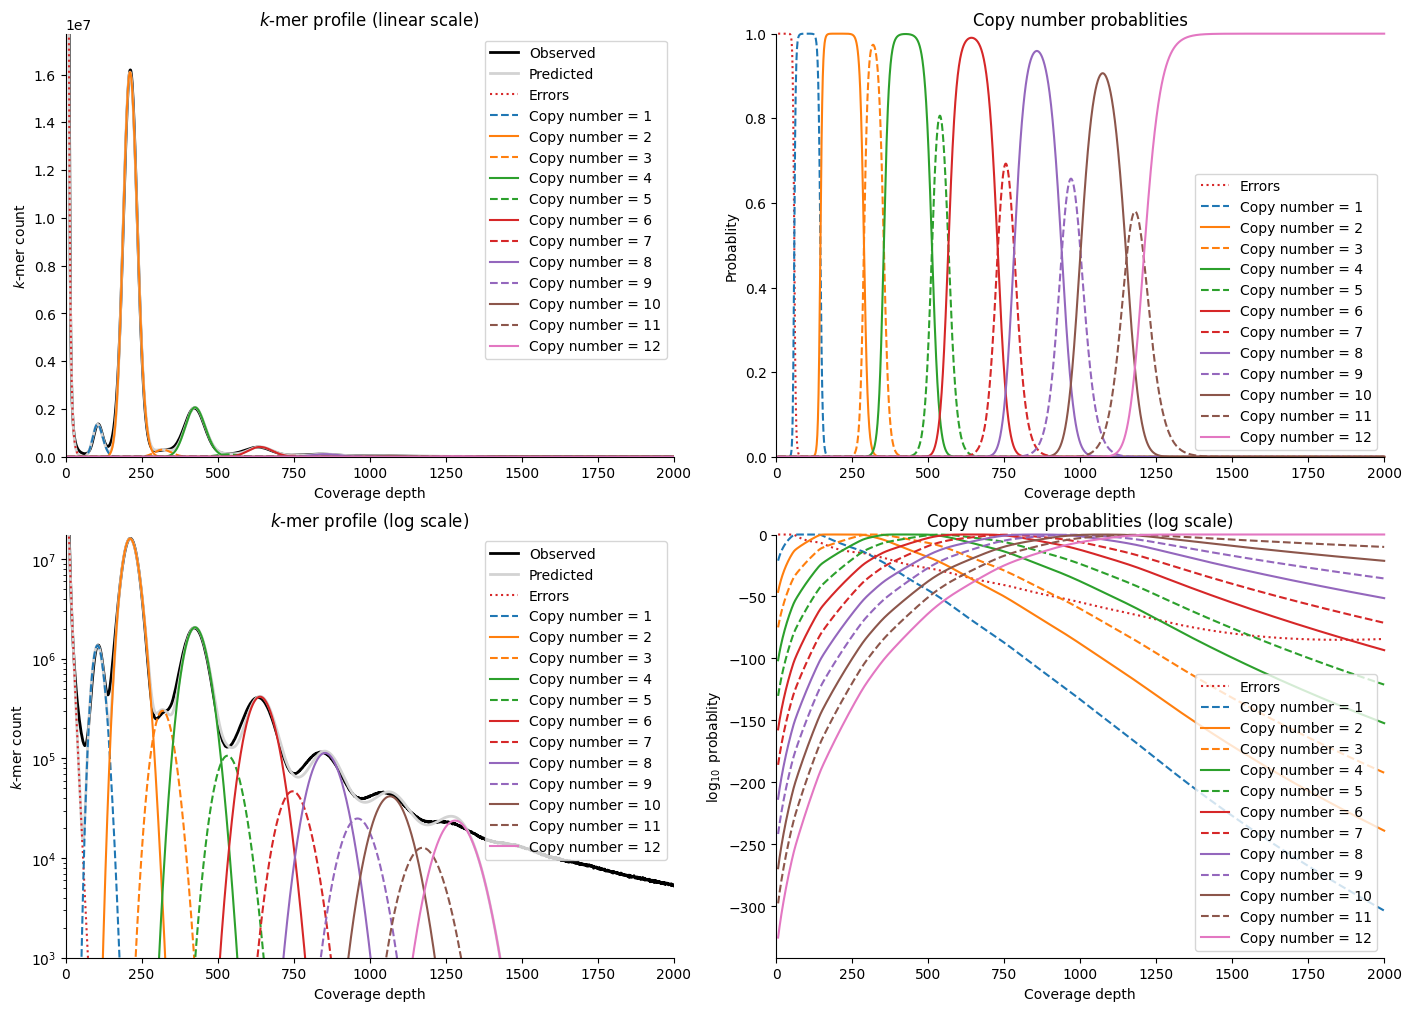

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False, constrained_layout=True)
result.plot_model(axes[0, 0], scale='linear')
result.plot_model(axes[1, 0], scale='log')
result.plot_probablity(axes[0, 1], scale='linear')
result.plot_probablity(axes[1, 1], scale='log')

In [6]:
prob_df = result.get_log_probablity_dataframe()
prob_df

,depth,CN=0,CN=1,CN=2,CN=3,CN=4,CN=5,CN=6,CN=7,CN=8,CN=9,CN=10,CN=11,CN=12
0,6,0.000000,-21.112225,-46.241283,-74.953996,-101.426169,-130.204211,-157.215105,-185.845878,-213.200406,-241.641317,-269.236592,-297.599458,-3.251962e+02
1,7,0.000000,-20.183687,-45.029336,-73.571993,-99.922278,-128.605250,-155.538194,-184.102902,-211.400100,-239.790375,-267.340305,-295.662117,-3.232213e+02
2,8,0.000000,-19.314978,-43.879949,-72.253517,-98.482406,-127.070608,-153.925803,-182.424591,-209.664568,-238.004292,-265.508945,-293.789758,-3.213115e+02
3,9,0.000000,-18.497564,-42.784534,-70.989967,-97.097951,-125.591681,-152.369328,-180.802339,-207.985204,-236.274461,-263.733906,-291.973776,-3.194581e+02
4,10,0.000000,-17.724910,-41.736505,-69.774746,-95.762311,-124.161866,-150.862164,-179.229541,-206.355402,-234.594276,-262.008581,-290.207564,-3.176545e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1996,-84.306770,-302.889245,-238.461726,-191.761240,-151.844808,-120.782611,-93.036278,-71.025417,-51.169023,-35.320662,-21.156052,-9.977646,-4.572301e-11
1991,1997,-84.297198,-303.025925,-238.584043,-191.869654,-151.939751,-120.864487,-93.105469,-71.082283,-51.213905,-35.353882,-21.177913,-9.988439,-4.459976e-11
1992,1998,-84.287562,-303.162548,-238.706310,-191.978025,-152.034656,-120.946331,-93.174634,-71.139129,-51.258770,-35.387089,-21.199767,-9.999228,-4.350737e-11
1993,1999,-84.277862,-303.299115,-238.828528,-192.086352,-152.129523,-121.028144,-93.243772,-71.195952,-51.303618,-35.420283,-21.221612,-10.010014,-4.243967e-11


## Log residuals

In [7]:
model = KmerProfileModel(df['depth'], df['count'], 12, 15, 1400)
result = model.fit(107, residuals='log')
result

/workspace/kmer-profile-decomposer/src/kmer_profile_decomposer/decomposer.py:217: RuntimeWarning: divide by zero encountered in log
  predicted_log_counts = np.log(predicted_counts)


_KmerProfileModelFitResult(peaks=12, min_depth=15, max_depth=1400, parameters=_KmerProfileModelParameters(error_dispersion=0.06066223941501241, error_weight=1.3948464541979908, haploid_depth=106.7626966769535, peak_dispersion_bias=2.1578123786387473, peak_weights=[0.02975258298495382, 0.44917184350865486, 0.010062709375761278, 0.09149174957672326, 0.004201042722376916, 0.023860060163269838, 0.0023244409078502673, 0.007684191717581076, 0.001371787952220229, 0.0034029126874339007, 0.00047578840648188666, 0.002551499097258719]))

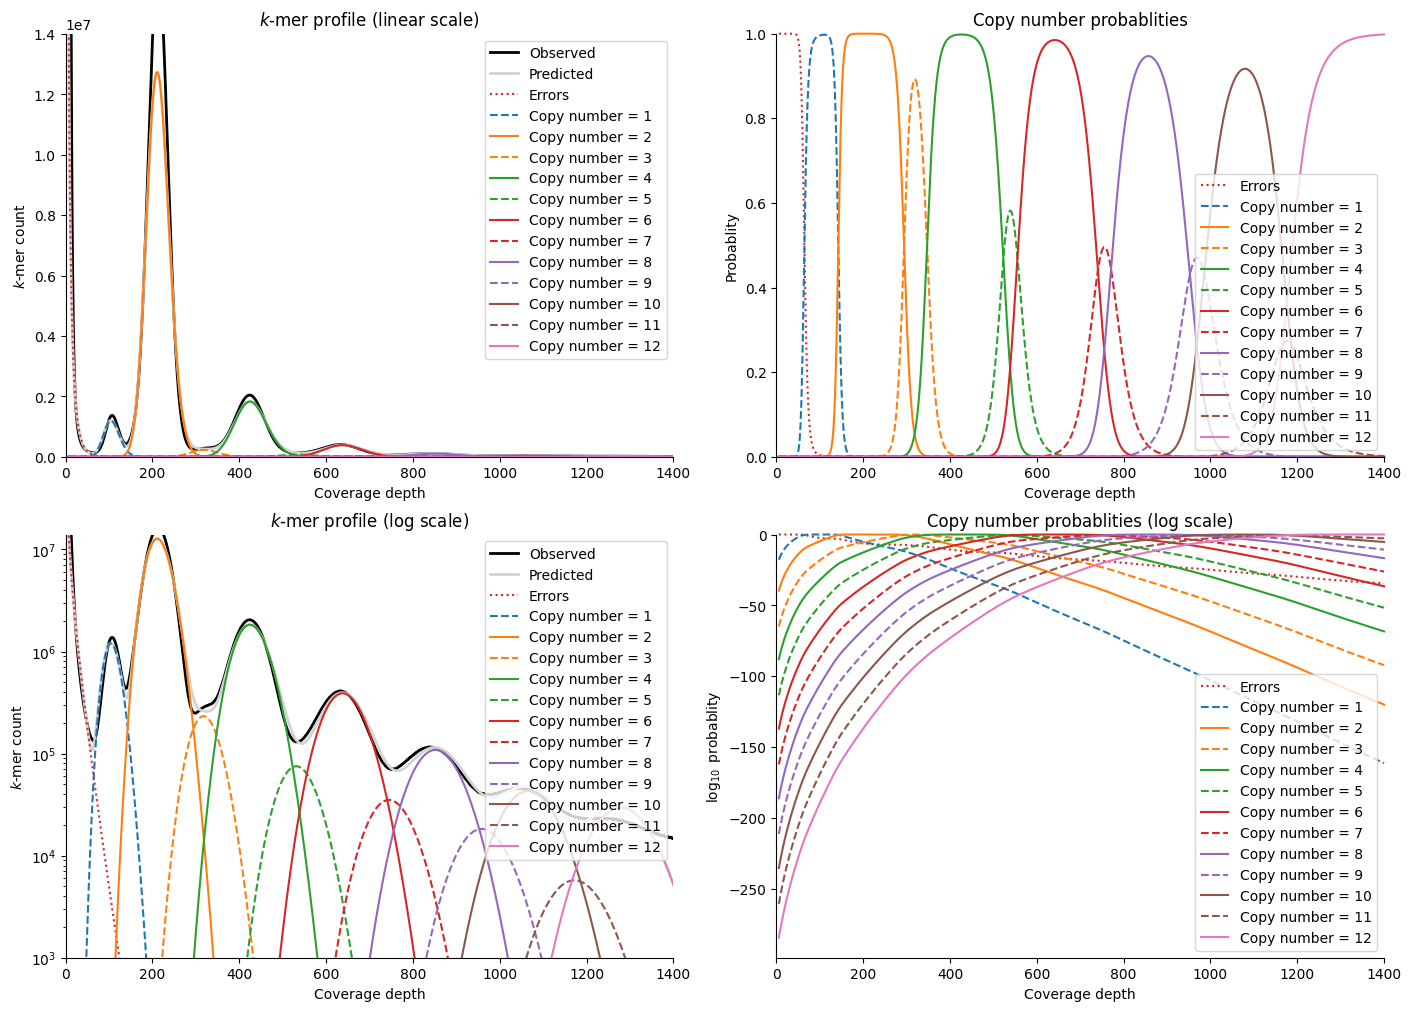

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False, constrained_layout=True)
result.plot_model(axes[0, 0], scale='linear')
result.plot_model(axes[1, 0], scale='log')
result.plot_probablity(axes[0, 1], scale='linear')
result.plot_probablity(axes[1, 1], scale='log')